### Heroes Of Pymoli Data Analysis

-----

    - Purchases made by male players are almost 6 times than made by female players. But this needs to be seen in context that only from the sample data only 14% are females
    - Most popular purchase has been "Oathbreaker, Last Hope of the Breaking Storm" among players
    - Maximum purchases are made bby players on 20-24 age demograph with average purchase per person being $4
    

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)


## Player Count

* Display the total number of players


In [2]:
purchase_data["Total Players"] = purchase_data["SN"].nunique()
purchase_data[["Total Players"]].head(1)

,Total Players
0,576


# Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [15]:
u_items = purchase_data["Item ID"].nunique()
avg_price = purchase_data["Price"].mean()
n_purchase = purchase_data["Purchase ID"].sum()
t_revenue = purchase_data["Price"].sum()

result = [{"Number of Unique Items":u_items,
         "Average Price":avg_price,
         "Number of Purchases":n_purchase,
         "Total Revenue":t_revenue}]



result_df = pd.DataFrame(result)


In [16]:
#Formatting
result_df["Average Price"] = result_df["Average Price"].map('${:,.2f}'.format)
result_df["Total Revenue"] = result_df["Total Revenue"].map('${:,.2f}'.format)

In [17]:
result_df

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,183,$3.05,303810,"$2,379.77"


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [27]:
total_count = purchase_data.groupby("Gender")["SN"].nunique()
percent_player = total_count/sum(total_count)*100
demo = {"Total Count":total_count,
           "Percentage of Players":percent_player}
demo_df = pd.DataFrame(demo)


In [28]:
#Formatting
demo_df["Percentage of Players"] = demo_df["Percentage of Players"].map('{:,.2f}%'.format)

In [29]:
demo_df

,Total Count,Percentage of Players
Gender,,
Female,81,14.06%
Male,484,84.03%
Other / Non-Disclosed,11,1.91%



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [32]:
purchase_count = purchase_data.groupby("Gender")["Purchase ID"].count()
avg_price = purchase_data.groupby("Gender")["Price"].mean()
total_pur = purchase_data.groupby("Gender")["Price"].sum()
avg_pur = total_pur/total_count
summary = {"Purchase Count":purchase_count,
          "Average Purchase Price":avg_price,
          "Total Purchase Value":total_pur,
          "Avg Total Purchase per Person":avg_pur}

summary_df = pd.DataFrame(summary)


In [34]:
#Formatting
summary_df["Average Purchase Price"] = summary_df["Average Purchase Price"].map('${:,.2f}'.format)
summary_df["Total Purchase Value"] = summary_df["Total Purchase Value"].map('${:,.2f}'.format)
summary_df["Avg Total Purchase per Person"] = summary_df["Avg Total Purchase per Person"].map('${:,.2f}'.format)

In [35]:
summary_df

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Gender,,,,
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,"$1,967.64",$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [37]:
age_bin=[0,9,14,19,24,29,34,39,100]
age_grp=["<10","10-14","15-19","20-24","25-29","30-34","35-39","40+"]

age_bracket = pd.cut(purchase_data["Age"], age_bin, labels = age_grp)

num_player_by_age = purchase_data.groupby(age_bracket)["SN"].nunique()


percent_player = np.divide(num_player_by_age, num_player_by_age.sum()) * 100

age_demo = {"Total Count":num_player_by_age,
           "Percentage of Players":percent_player}

age_demo_df = pd.DataFrame(age_demo)


In [38]:
#Formatting
age_demo_df["Percentage of Players"] = age_demo_df["Percentage of Players"].map('{:,.2f}%'.format)


In [39]:
age_demo_df.head(10)

,Total Count,Percentage of Players
Age,,
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [40]:
import numpy as np
pur_count = purchase_data.groupby(age_bracket)["Purchase ID"].count()
pur_avg = purchase_data.groupby(age_bracket)["Price"].mean()
pur_total = purchase_data.groupby(age_bracket)["Price"].sum()
pur_total_avg = pur_total/num_player_by_age
#pur_total_avg

pur_analysis = {"Purchase Count":pur_count,
               "Average Purchase Price":pur_avg,
               "Total Purchase Value":pur_total,
               "Avg Total Purchase per Person":pur_total_avg}

pur_analysis_df = pd.DataFrame(pur_analysis)


In [41]:
#Formatting
pur_analysis_df["Average Purchase Price"] = pur_analysis_df["Average Purchase Price"].map('${:,.2f}'.format)
pur_analysis_df["Total Purchase Value"] = pur_analysis_df["Total Purchase Value"].map('${:,.2f}'.format)
pur_analysis_df["Avg Total Purchase per Person"] = pur_analysis_df["Avg Total Purchase per Person"].map('${:,.2f}'.format)

In [42]:
pur_analysis_df

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Age,,,,
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [46]:
indiv_pur_count = purchase_data.groupby("SN")["Purchase ID"].count()
indiv_pur_avg = purchase_data.groupby("SN")["Price"].mean()
indiv_pur_total = purchase_data.groupby("SN")["Price"].sum()
top_spender = {"Purchase Count":indiv_pur_count,
              "Average Purchase Price":indiv_pur_avg,
              "Total Purchase Value":indiv_pur_total}
top_spender_df = pd.DataFrame(top_spender)
top_spender_sorted = top_spender_df.sort_values("Total Purchase Value", ascending=False)


In [47]:
#Formatting
top_spender_sorted["Average Purchase Price"] = top_spender_sorted["Average Purchase Price"].map('${:,.2f}'.format)
top_spender_sorted["Total Purchase Value"] = top_spender_sorted["Total Purchase Value"].map('${:,.2f}'.format)

In [48]:
top_spender_sorted.head()

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.41,$13.62
Iskadarya95,3,$4.37,$13.10


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [60]:
subset_id = purchase_data[["Item ID","Item Name","Price"]]
subset_id_grouped = subset_id.groupby(["Item ID","Item Name"])
item_pur_count = subset_id_grouped[["Item ID"]].count()
item_pur_count = item_pur_count.rename(columns={"Item ID":"Purchase Count"})

item_total_pur = subset_id_grouped[["Price"]].sum()
item_total_pur = item_total_pur.rename(columns={"Price":"Total Purchase Value"})

price = subset_id_grouped[["Price"]].max()
price = price.rename(columns={"Price":"Item Price"})

pop_item = item_pur_count.join(price)

pop_item = pop_item.join(item_total_pur)

pop_item_df = pop_item.sort_values("Purchase Count",ascending = False)



In [61]:
#Formatting
pop_item_df["Item Price"] = pop_item_df["Item Price"].map('${:,.2f}'.format)
pop_item_df["Total Purchase Value"] = pop_item_df["Total Purchase Value"].map('${:,.2f}'.format)

In [62]:
pop_item_df.head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
82,Nirvana,9,$4.90,$44.10
19,"Pursuit, Cudgel of Necromancy",8,$1.02,$8.16


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [63]:
prof_items_df = pop_item_df.sort_values("Total Purchase Value",ascending=False)

prof_items_df.head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
63,Stormfury Mace,2,$4.99,$9.98
29,"Chaos, Ender of the End",5,$1.98,$9.90
173,Stormfury Longsword,2,$4.93,$9.86
1,Crucifer,3,$3.26,$9.78
38,"The Void, Vengeance of Dark Magic",4,$2.37,$9.48


# Matplotlib

In [64]:
import matplotlib.pyplot as plt
age_demo_df.head()


,Total Count,Percentage of Players
Age,,
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%


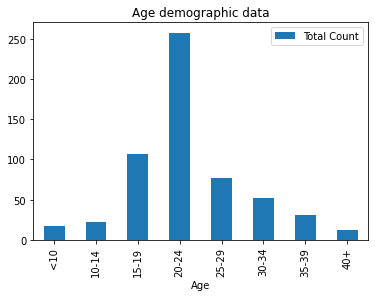

In [65]:
age_demo_df.plot(kind="bar",title="Age demographic data")

plt.show()

Graph displays the distribution of players data across age groups
The graph make it clear that the player who made purchases are concentrated in the early 20s age group.

# Data Manipulation with Pandas

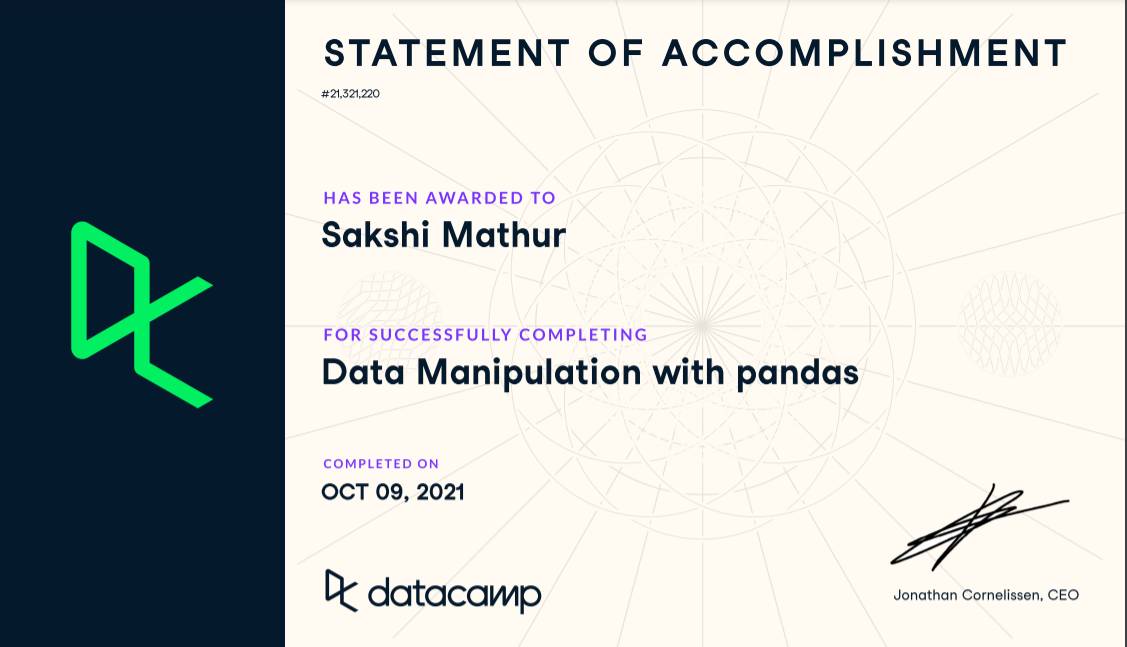